# Motor Imagery: Preprocessing and feature straction

**Authors**:

 - Mercedes Riveira mercedesriveira97@gmail.com | [@MercedesRiveira [in]](https://www.linkedin.com/in/mercedes-riveira-martin/)
 - Borja Sánchez Leirado borja.sanchez.leirado@gmail.com | [@BorjaSanchez [in]](https://www.linkedin.com/in/borjasanlei/)

---

_This code is Open Source, released under a GPL License._

In [15]:
import pandas as pd
import numpy as np
import mne
from scipy.signal import welch

## Loading data 

We load raw data as `mne.io.Raw` objects into a dictionary. Each key is a subject 

In [16]:
def raw(n=14):
    
    '''Function for loading data
    n = number of subjects'''
    
    raw_002 = {}
    path = '../data/vendor/bnci-002-2014/'
    for i in range(n):
        raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)
    
    return(raw_002)
    
raw_002 = raw()

#Example
raw_002['0']

Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-1.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...
Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-2.fif...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)
<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...
Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-3.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-4.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-5.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-6.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-7.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-8.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-9.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-9.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-10.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-11.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-12.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-13.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Opening raw data file ../data/vendor/bnci-002-2014/bnci-002-2014-14.fif...
Isotrak not found
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.


<ipython-input-16-a7a2aa110a6e>:7: RuntimeWarning: This filename (../data/vendor/bnci-002-2014/bnci-002-2014-14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_002[str(i)] = mne.io.read_raw_fif(path + f'bnci-002-2014-{i+1}.fif', preload= True)


Reading 0 ... 409599  =      0.000 ...   799.998 secs...


<Raw  |  bnci-002-2014-1.fif, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>

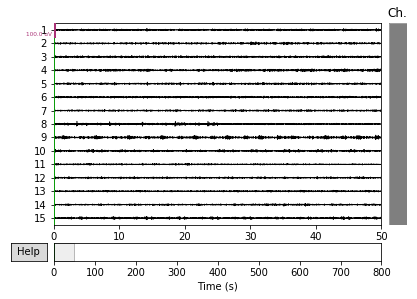

In [17]:
fig = raw_002['0'].plot(start = 0., duration = 50, scalings=0.5e-4, remove_dc=True)

Effective window size : 4.000 (s)


<ipython-input-18-ca4fef03cc03>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw_002['0'].plot_psd()


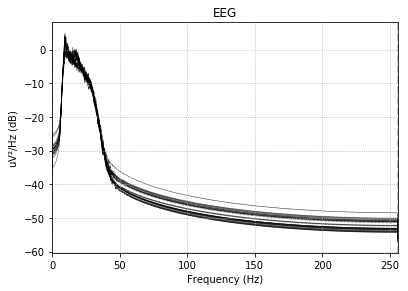

In [18]:
fig = raw_002['0'].plot_psd()

### Definitions

Some definitions to preprocess data and compute feature extractions.

In [66]:
def filters(raw, fmin = 0.5, fmax = 100., notch = 50., sampling_rate = 512, fir_design = 'firwin'):

    '''Apply high/low-pass and notch filters:
        
        === Args ===
        * raw - mne Raw object: object to apply filters on
        * fmin, fmax - float: bandpass frequencies
        * notch - float: powerline (AC current) frequecy
        * ny_freq - float: Nyquist frequency. Half of the sampling rate
        * fir_design: str: Notch filter type. See mne doc for more details
        * sampling_rate - int, float: sampling rate of the measured data
        
        === Returns ===
        * raw_c - mne Raw object: Processed Raw copy 
        '''
    raw_c = raw.copy()
    raw_c.filter(l_freq = fmin, h_freq = fmax)
    raw_c.notch_filter(np.arange(notch, sampling_rate/2, notch), fir_design=fir_design)
    return raw_c

In [67]:
def make_epochs(raw, tmin = 0.0, duration = 5, id_name = 333, sampling_rate = 512):
   
    '''Epoch data based on regular known events:
        
        === Args ===
        * raw - mne Raw object: object to epoch
        * tmin, (duration) - float: time in seconds as the origin (duration) of the epoch since the event
        * id - int: id name for the events
        * sampling_rate - int, float: sampling rate of the measured data
        === Returns ===
        * events - array: time ticks of the events
        * epochs - mne Epochs object: Epoched data
        * raw_c - mne Raw object: Processed Raw copy 
        '''
    
    raw_c = raw.copy()
    events = mne.make_fixed_length_events(raw_c, id = id_name, duration = duration-1/sampling_rate)
    #Reject trials
    epochs = mne.Epochs(raw_c, events, event_id = id_name, tmin=tmin, tmax=tmin+duration,
                        preload=True, baseline=None, verbose=True, reject = None)

    return events, epochs, raw_c

def plot_epochs(raw, events, epochs):
    raw.plot(events = events)
    

In [68]:
def convert_to_freq_domain(df, epoch = '0', n_channels = 15, sampling_rate = 512):
    
    '''Use Welch's method to obtain the Power Spectral Density (PSD):
        
        === Args ===
        * df - pandas DataFrame: df with the time series data for one epoch, with channels as columns and entries as rows
        * epoch - string: epoch to perform the operation to
        * n_channels - int: number of total channels
        * sampling_rate - int, float: sampling rate of the measured data
        === Returns ===
        * df - pandas DataFrame: df with channels as columns and rows as frequencies
        '''
        
    psd = {}
    freq = {}
    data_epoch = df.loc[epoch][df.columns[2:n_channels +2]].to_numpy()
    for i in range(data_epoch.shape[1]):
        freq[str(i)], psd[str(i)] = welch(data_epoch[:,i], fs = sampling_rate, nfft=4*sampling_rate)
    
    df = pd.DataFrame(psd)
    df['Frequencies'] = freq['0']
    return df
        

In [69]:
def compute_average(df, fmin = 7, fmax = 14):
    
    '''Extract the feature of each channel as mean the value of the PSD for one epoch:
        
        === Args ===
        * df - pandas DataFrame: df with the PSD, with channels as columns and frequencies as rows
        * fmin, fmax - float, int: min and max frequencies of the selected band
        === Returns ===
        * df - pandas Series: one column with the features of each channel
        '''
    
    df_sel = df[(df.Frequencies >= fmin) & (df.Frequencies <= fmax)].copy()
    df_sel.drop('Frequencies', inplace = True, axis = 1)
    means = df_sel.apply(np.mean, axis=0, result_type = 'expand')
    return means

### Pipeline

We gather all the functions in one pipeline for processing and another for feature extraction.

In [70]:
def prep_pipeline(raw, *karg):
    raw_filtered = filters(raw, *karg)
    events, epochs, raw_epochs = make_epochs(raw_filtered, *karg)
    
    return events, epochs.to_data_frame(index=['epoch']), raw_epochs

In [71]:
def feature_pipeline(df, *kargs):
    features_df = {}
    for epoch in pd.unique(epochs.index):
        psd_df = convert_to_freq_domain(df, epoch = epoch, *kargs)
        features_df[epoch] = compute_average(psd_df, *kargs)
    return(pd.DataFrame(features_df).transpose())

# Implementation: feature extraction

A dictionary with one key for each subject the features as DataFrame one column for each channel and one row for each epoch. <p style="color: red"> **Caution** Features are written to disk. Do not run this cell without pourpose.</p>

In [85]:
features = {}
path = './data/2-processing/'

for subject in raw_002.keys():
    events, epochs, raw_epochs = prep_pipeline(raw_002[subject])
    features[subject] = feature_pipeline(epochs)
    features[subject].to_csv(path + f'bnci-002-2014-{int(subject)+1}-features.csv', index_label = 'Epoch')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 3379 samples (6.600 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3379 samples (6.600 sec)

160 matching events found
No baseline correction appl

- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 3379 samples (6.600 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3379 samples (6.600 sec)

160 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 160 events and 2561 original time points ...
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter para

In [73]:
features['5']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.603359,0.831596,0.587286,0.495089,1.464015,0.992372,0.359433,1.243538,0.507508,0.796962,1.030153,0.714583,0.561373,1.007206,0.572957
1,0.627688,0.723011,0.404506,0.612158,1.226518,0.978328,0.546003,1.050788,0.493225,1.132564,0.828562,0.800090,0.811299,0.805720,0.573925
2,1.158312,0.324258,0.334689,1.167899,0.727361,1.061085,0.605581,0.712029,0.516203,1.764842,0.658760,0.917865,0.993292,0.428290,0.636542
3,0.377844,0.374896,0.442203,0.248613,0.635288,1.449755,0.253767,0.787626,0.643342,0.551878,0.620579,0.788872,0.449492,0.685743,0.766907
4,0.487660,0.797748,0.761824,0.327325,1.355660,2.153051,0.385209,1.235937,0.931279,0.789756,0.989384,0.995930,0.529615,0.940080,1.028474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.343319,0.554016,1.080664,0.685816,0.629883,1.123925,0.824587,0.523612,0.834060,0.697176,0.478117,1.028877,0.562010,0.375718,1.005767
156,0.324593,0.340429,1.011883,0.580524,0.919149,0.877657,0.784064,0.532999,0.626527,0.582040,0.970564,0.872464,0.625302,0.608169,0.829622
157,0.341745,0.872568,0.535074,0.588251,1.886944,0.717846,0.805795,0.875668,0.507182,0.604714,0.771474,0.603115,0.669025,0.987353,0.468196
158,0.449108,0.560003,0.623910,0.751255,0.543363,0.980973,1.016652,0.530879,0.719691,0.687772,0.535400,0.595386,0.770049,0.340506,0.520973
